![Python logo](https://g.foolcdn.com/art/companylogos/square/shop.png)


## Dataset information

This dataset contains sneakers orders data on 100 shops's Shopify on over a 30 day window.Let's start by reading the data and visualizing what it looks like.



## Objectives


On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.


## Answer to part a
### a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.

Existence outliers ,fraudulent or invalid data can increase the mean and therefore AOV significantly. Let's explore data in details:



## Data exploration

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
#  reading the data into a pandas dataframe

df=pd.read_csv("C:/Users/14379/Downloads/New folder/shopify.csv")
df

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [6]:
df.isnull().sum()


order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
dtype: int64

The result shows there is no NULL value in our dataset.



In [7]:
df.shape

(5000, 7)

In [7]:
# # print general statistics about the dataset

df[["order_amount","total_items"]].describe()

,order_amount,total_items
count,5000.000000,5000.00000
mean,3145.128000,8.78720
std,41282.539349,116.32032
min,90.000000,1.00000
25%,163.000000,1.00000
50%,284.000000,2.00000
75%,390.000000,3.00000
max,704000.000000,2000.00000



We can see that this dataset has a huge SD of $ 41282.5 and 116 items.

The minimum number of items and order amount is 1 and $ 90,respectively. 

However ,the maximum is 2000, and $704000 which clearly indicates a wholesale process or fraudulent transition.

This difference between minimum and maximum values leads to a large AOV of $3145.13. 

However, the 75% quartile(3 items and $ 390 value) indicates the reported AOV does not apply to all stores.



In [8]:
# print the total number of items bought by a certain user from a certain shop
# We can identify the buyers shopping habits with this analysis

items_per_user_per_shop = df.groupby(['user_id', 'shop_id'])['total_items'].sum().\
                                          reset_index(name='total_num_items').\
                                          sort_values(by='total_num_items',ascending=False)
items_per_user_per_shop.head(10)

,user_id,shop_id,total_num_items
0,607,42,34000
4458,990,80,10
760,749,65,9
508,733,54,8
3552,932,66,7
745,748,59,7
2483,861,81,7
39,702,96,7
2673,873,50,7
1590,801,87,7


From the table below, we can conlcude that user 607 is probably buying wholesale from shop_id 42 or the purchases are fraudulent. Below we can look into all the purchases pertaining to user 607. We can also see that it is the exact order which is placed at the exact same time.

In [10]:
# filter the data by user_id and print the records pertaining to user_id=607
user_607_df = df.loc[df['user_id'] == 607]
user_607_df.head(50)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00


## ***Answer to part b***
b.	What metric would you report for this dataset?

> The dataset contains outliers, so we can use **median order value**. Median reports the middle value in our order values and therefore minimizes the effect of outliers 


## ***Answer to part c***
c.	What is its value?

> The 50% quantile or median is **\$284**. (Please refer to table below)

In [11]:
# print general statistics about the dataset
df[['order_amount','total_items']].describe()

,order_amount,total_items
count,5000.000000,5000.00000
mean,3145.128000,8.78720
std,41282.539349,116.32032
min,90.000000,1.00000
25%,163.000000,1.00000
50%,284.000000,2.00000
75%,390.000000,3.00000
max,704000.000000,2000.00000


## ***More thoughts about part b and c***

It is true that the median order value gives us a more reasonable and generalizable number, however, I believe that both the customers with lower numbers of orders and AOVs (which in our case are the majority of customers) and the customers with exceptionally high AOVs are important for the business. Therefore, it might be useful to group the customers by their AOV and provide the service that is most appropriate for their shopping habits.

Below are some further analysis and visualization regarding our dataset which can be useful in identifying the most beneficial service for each customer.

Text(0, 0.5, 'Frequency')

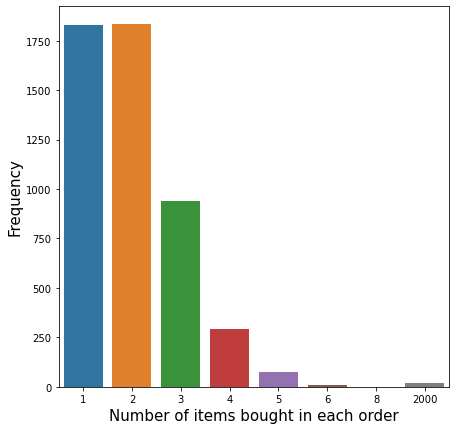

In [12]:
# the number of times the customers purchased certain number of items
freq_total_items = df.groupby(['total_items'])['order_id'].count().reset_index(name='count_of_num_orders')

# plot
f, ax = plt.subplots(figsize=(7, 7))
sns.barplot(x='total_items', y='count_of_num_orders', data=freq_total_items, ax=ax)
ax.set_xlabel('Number of items bought in each order', fontsize=15)
ax.set_ylabel('Frequency', fontsize=15)

We can conclude from this graph that most of the orders contain less than 6 items purchased (typically 1 or 2).

In [13]:
# compute the AOV for each user
aov_per_user = df.groupby(['user_id'])['order_amount'].mean().\
                                          reset_index(name='aov_per_user').\
                                          sort_values(by='aov_per_user',ascending=False)

aov_per_user.head(10) 

,user_id,aov_per_user
0,607,704000.000000
179,878,14266.909091
67,766,8007.600000
135,834,6019.000000
216,915,5785.142857
263,962,5743.428571
76,775,5069.625000
118,817,5061.750000
229,928,5041.750000
156,855,4759.705882


Text(0.5, 1.0, 'AOV per User')

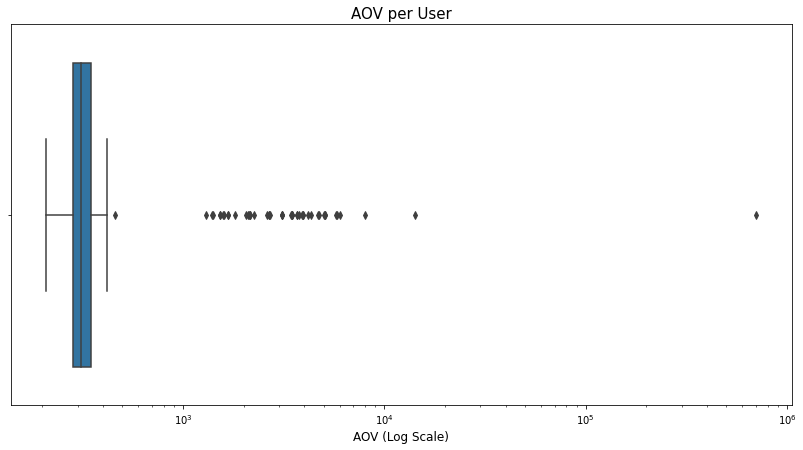

In [14]:
f, ax = plt.subplots(figsize=(14, 7))
ax.set(xscale="log")
sns.boxplot(x='aov_per_user', data=aov_per_user, ax=ax)
ax.set_xlabel('AOV (Log Scale)', fontsize='large')
ax.set_title('AOV per User', fontsize=15)

From this plot we can see that users can be grouped into at least two or three groups. We can offer personalized services based on their AOV.

The other important factor in analyzing this data is the frequency of purchases by each user (how often do the users return)

In [17]:
num_orders_per_user = df.groupby(['user_id'])['order_id'].count().\
                                          reset_index(name='num_orders').\
                                          sort_values(by='num_orders',ascending=False)

num_orders_per_user.head(10)

,user_id,num_orders
19,718,28
169,868,27
92,791,26
148,847,26
88,787,25
87,786,25
28,727,25
94,793,24
124,823,24
46,745,24


Text(0.5, 1.0, 'Histogram of Orders per User')

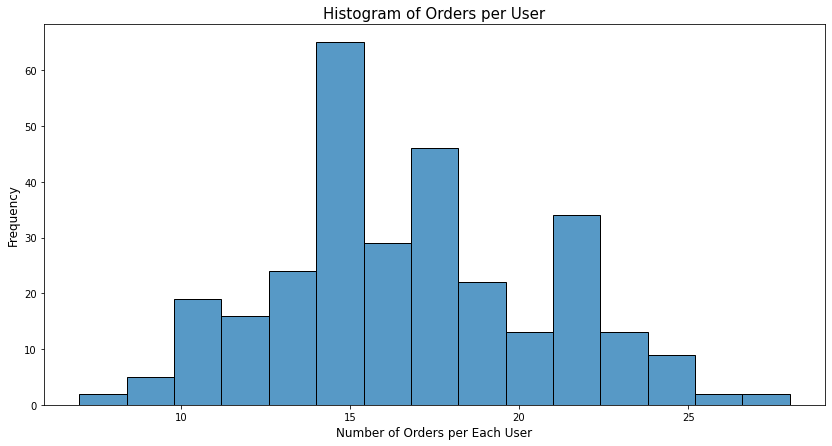

In [18]:
f, ax = plt.subplots(figsize=(14, 7))
sns.histplot(x='num_orders', data=num_orders_per_user, ax=ax)
ax.set_xlabel('Number of Orders per Each User', fontsize='large')
ax.set_ylabel('Frequency', fontsize='large')
ax.set_title('Histogram of Orders per User', fontsize=15)

This plot indicates that most of the users place an order 15 times a month. We can also offer personalized services based on how often each user places an order.

# SQL part


Question 2: For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

a) How many orders were shipped by Speedy Express in total?


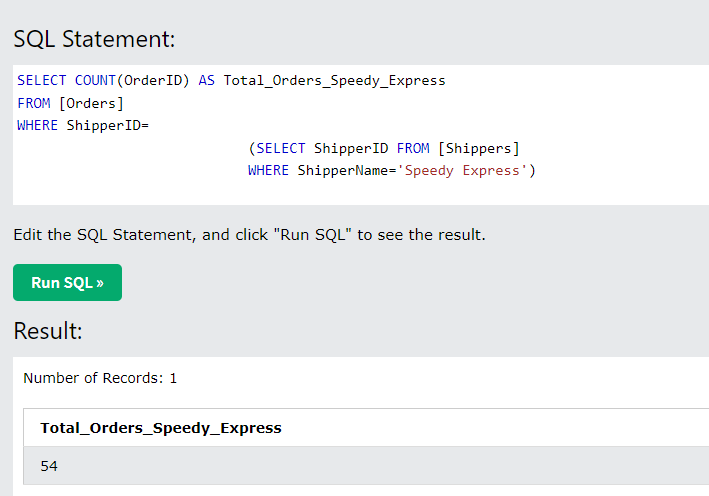

b) What is the last name of the employee with the most orders?


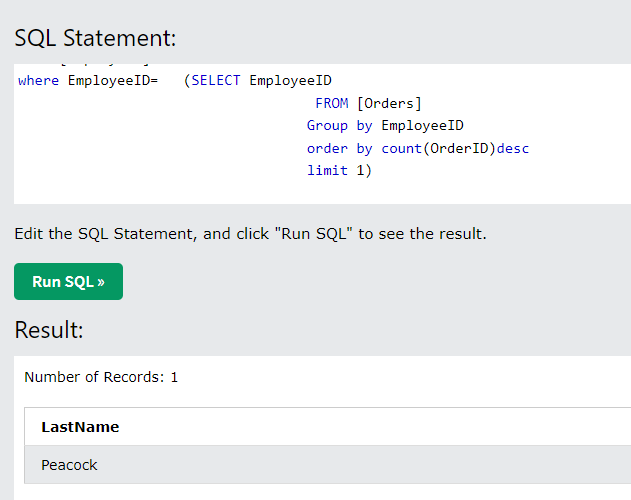

c) What product was ordered the most by customers in Germany?

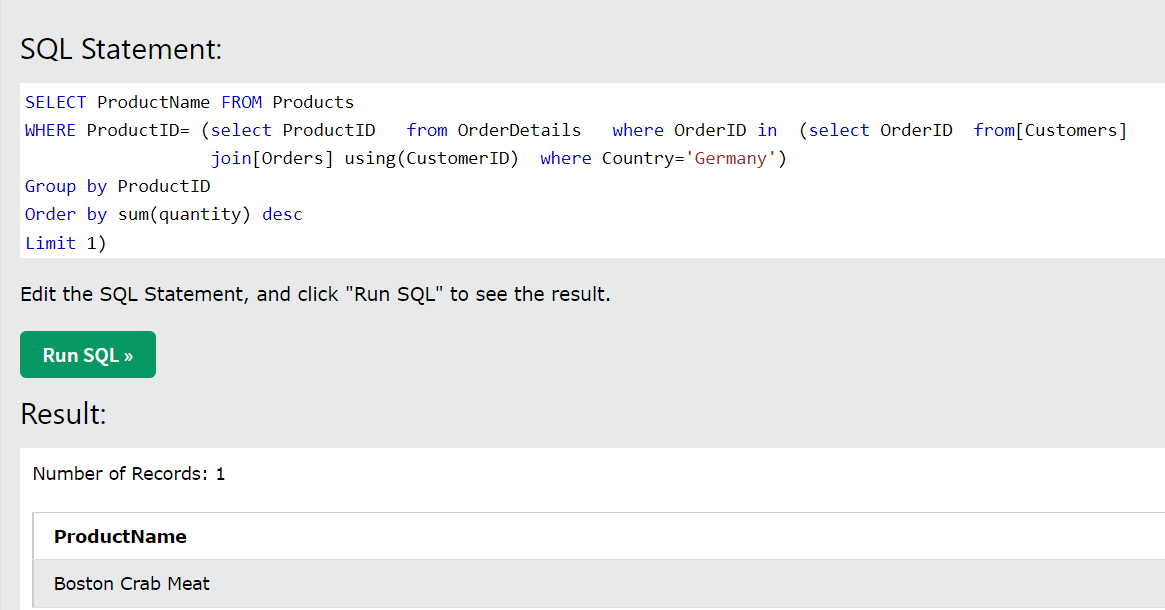